In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
from pylab import *

In [2]:
thetas = np.linspace(0, 360, 100)
us     = np.linspace(0, 1, 100)

x, y = np.meshgrid(us, thetas, sparse=True)

score = x*np.cos(np.radians(y)) - np.abs(x*np.sin(np.radians(y)))

score = pd.DataFrame(data=score, index=np.round(thetas, 2), columns=np.round(us, 2))

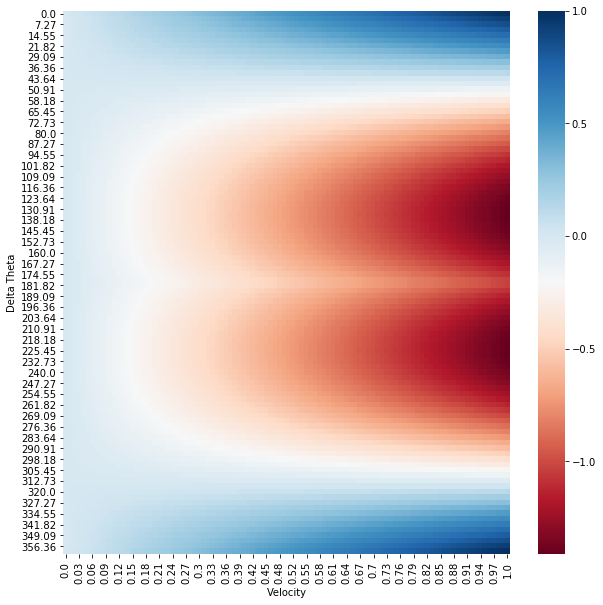

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = sns.heatmap(score, ax=ax, cmap='RdBu')
plt.xlabel('Velocity')
plt.ylabel('Delta Theta')
plt.show()

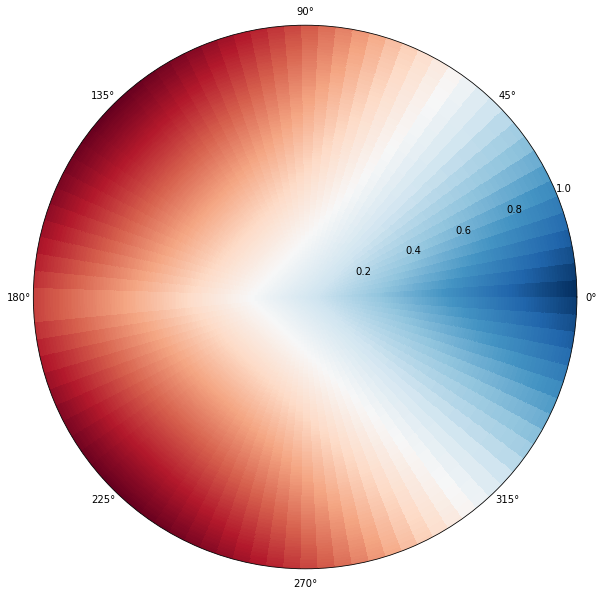

In [4]:
tmp = []

for u in us:
    for t in thetas:
        tmp.append([u, np.radians(t)])

tmp = np.array(tmp)

max_r = 1
max_theta = 2.0 * np.pi
points = tmp

values = points[:,0] * np.cos(points[:,1]) - np.abs(points[:, 0] * np.sin(points[:,1]))

theta = np.linspace(0.0, max_theta, 100)
r = np.linspace(0, max_r, 200)
grid_r, grid_theta = np.meshgrid(r, theta)
data = griddata(points, values, (grid_r, grid_theta), method='cubic',fill_value=0)

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(projection="polar")
ax1.pcolormesh(theta,r,data.T, cmap='RdBu')
plt.show()